<a href="https://colab.research.google.com/github/roncamposj/Algorithms_and_Data_Structures/blob/main/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 3
1. Upload a personal image in hosting place that can be accesed using an URL. 
2. Perform filtering using a 3x3 and then a 5x5 box filter. Show the resulting images. What is the effect of applying a box filter. Explain the differences between the two resulting images.


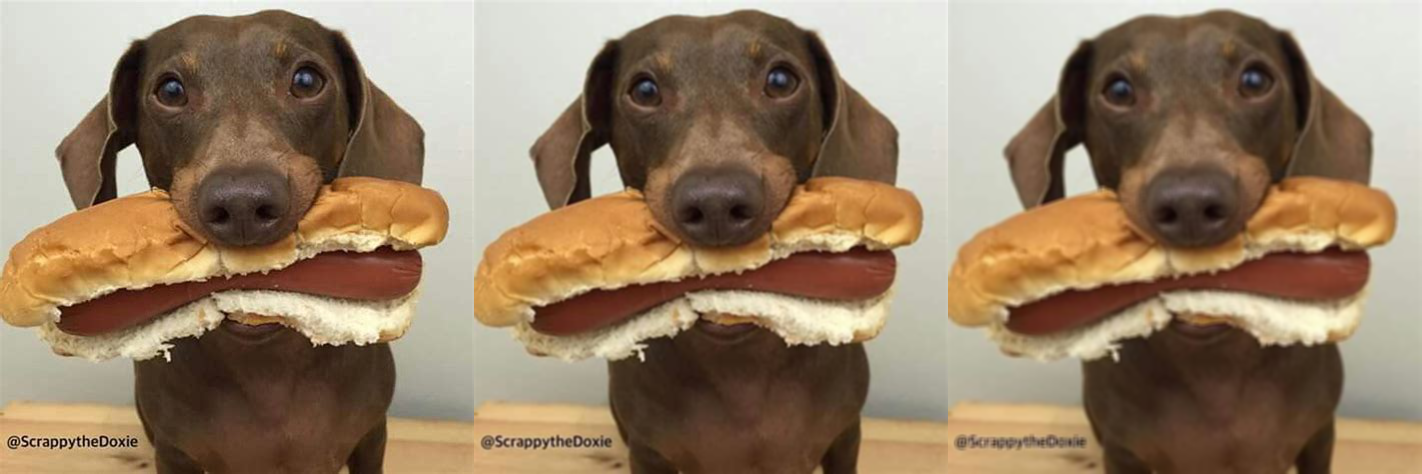

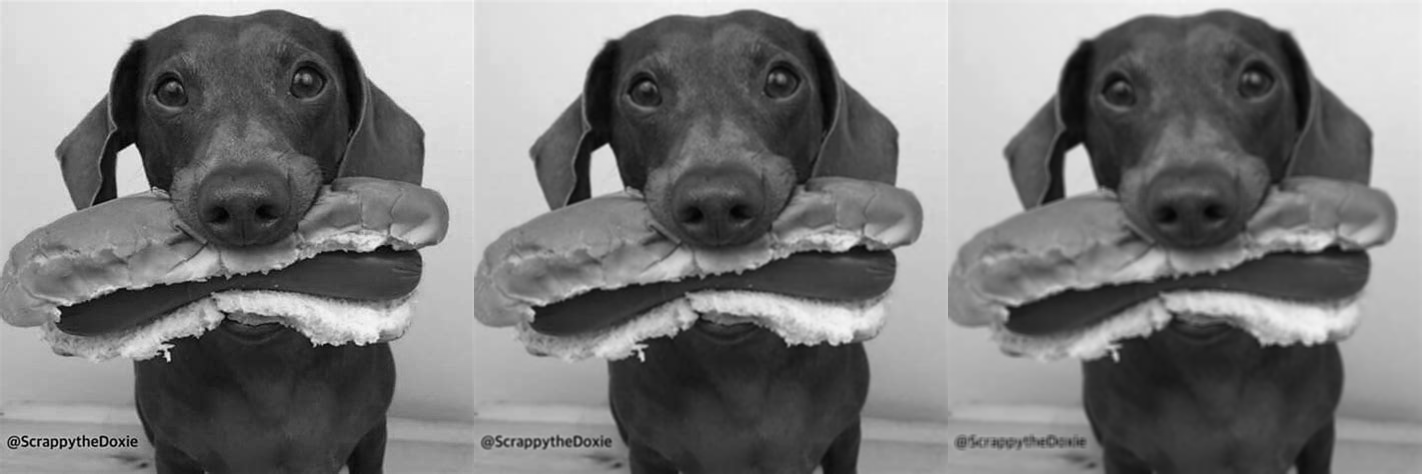

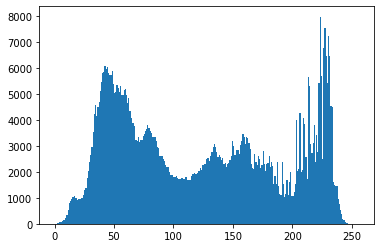

In [11]:
from skimage import io
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt



yourUrl = 'https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.MUbdAWkQHy5I_pcN81jo6wHaHa%26pid%3DApi&f=1'
image = io.imread(yourUrl)

# convert to BGR if you are using openCV
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#prepare the 3x3 shaped filter
k1 = np.ones((3, 3), np.float32)/9

#prepare the 5x5 shaped filter
k2 = np.ones((5, 5), np.float32)/25

# Normalize the kernels if needed. 3x3 filter has 1/9 factor, 5x5 has a 1/25 factor  


# apply filter
three_filter = cv2.filter2D(image,-1, k1)
five_filter = cv2.filter2D(image,-1, k2)

final_frame = cv2.hconcat((image,three_filter, five_filter))

#make sure you are the right data type and values. You can use histogram to check it
# 0-255 if uint8
# 0-1 if float

# visualize
cv2_imshow(final_frame)

# hist_im = cv2.cvtColor(final_frame, cv2.COLOR_RGB2BGR)
hist_im = cv2.cvtColor(final_frame, cv2.COLOR_RGB2GRAY)
cv2_imshow(hist_im)
plt.hist(hist_im.ravel(),bins = 256, range = [0,256]) 
plt.show()



The 3x3 filter causes less blurring than the 5x5 filter.  So as the dimensions get larger, the image gets blurrier.

3. Obtain and print two-dimensional Gaussian kernels with the following characteristics:<br>
a) $\sigma^2 = 1$, kernel size: 3x3, <br>b) $\sigma^2 = 1.2$, kernel size: 5x5, <br> c) $\sigma^2 = 1.6$, kernel size: 9x9. 





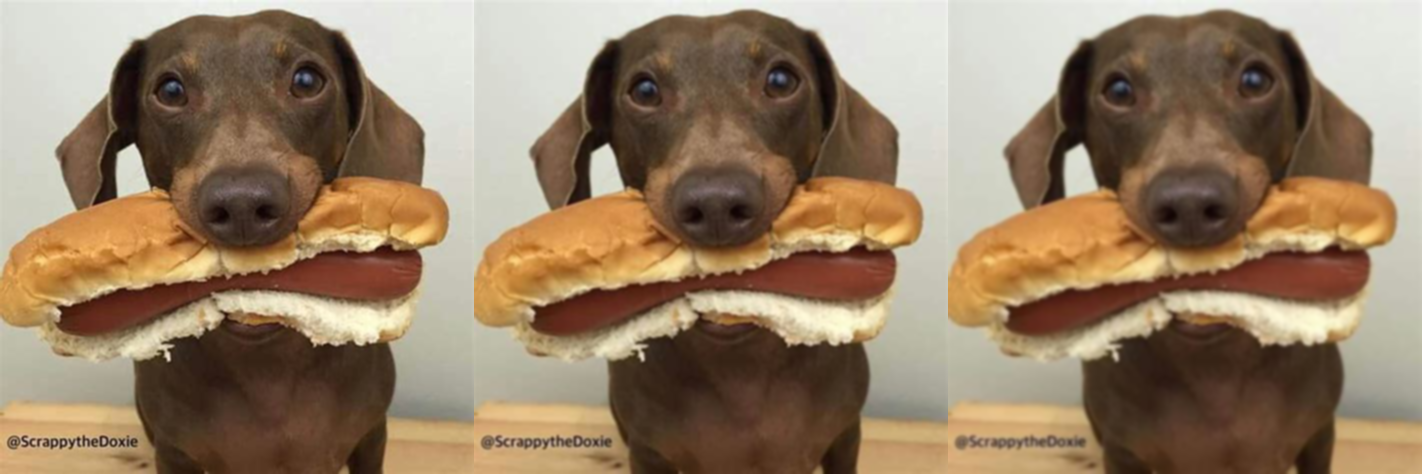

In [66]:
#add your code here

# A possible implementation is here. Modify it play with it:
#
import numpy as np

def gkern(l, sig):
  #  """\
  #  creates gaussian kernel with side length l and a sigma of sig
  #  """
   ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
  #  print(ax)
   xx, yy = np.meshgrid(ax, ax)
  #  print("XX from meshgrid")
  #  print(xx)
  #  print("YY from meshgrid")
  #  print(yy)
   kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))
  #  print(np.square(sig))
  #  print(-.5 * (np.square(xx) + np.square(yy)/ np.square(sig)))
  #  print("kernel")
  #  print(kernel)
  #  print("np sum kernel")
  #  print(np.sum(kernel))
  #  print(kernel/ np.sum(kernel))

   return kernel / np.sum(kernel)   #note that this normalize the filter to 1. is it desirable?.

g1 = gkern(3,1)
first_filter = cv2.filter2D(image, -1, g1)

g2 = gkern(5,1.2)
second_filter = cv2.filter2D(image,-1, g2) 

g3 = gkern(9,1.6)
third_filter = cv2.filter2D(image,-1, g3) 

final_gaussian =  cv2.hconcat((first_filter,second_filter,third_filter))

cv2_imshow(final_gaussian)




4. Apply the three
Gaussian kernels obtained previously on your uploaded image. show your filter results. Discuss the differences of
Gaussian operations with different sigmas. Also, compare your results with question 2: what are the differences between these ﬁlters, what do you observe ? Which ﬁltering is the most eﬀective in which images ? Why ? 

The difference between the difference gaussian operations are subtle, but I notice that as the dimensions and sigma get larger, the image gets blurrier.  When compared to the box filters, I would say that the 9x9 gaussian filter and the box 5x5 filters are indiscernable.  So this leads me to say that the box filter is more effective, as there is less computation involved in that one.


5. Implement the three steps of Sobel filtering. Apply it to the uploaded image for 3 different thresholds. Show the results on
the screen, and discuss the resulting images.



shape of sobel x and y added together
(474, 474)
Original Sobel Filter and Binary Threshold


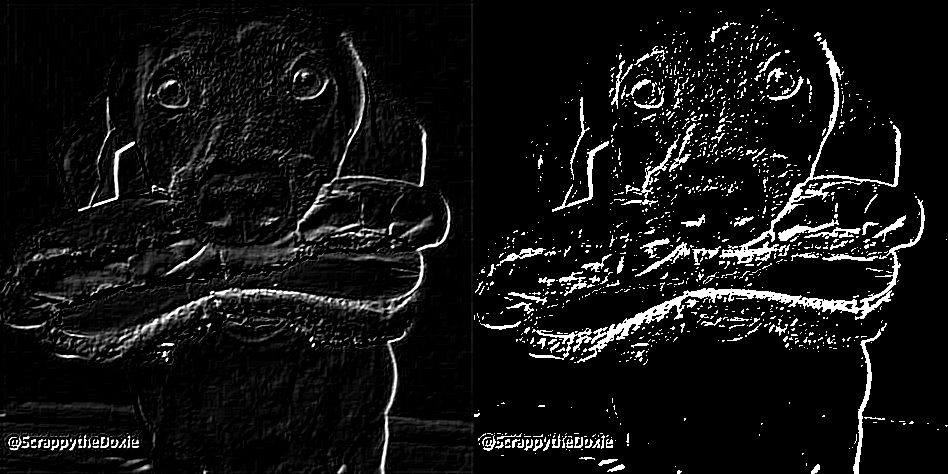

Binary Threshold Inverse and To-Zero Threshold


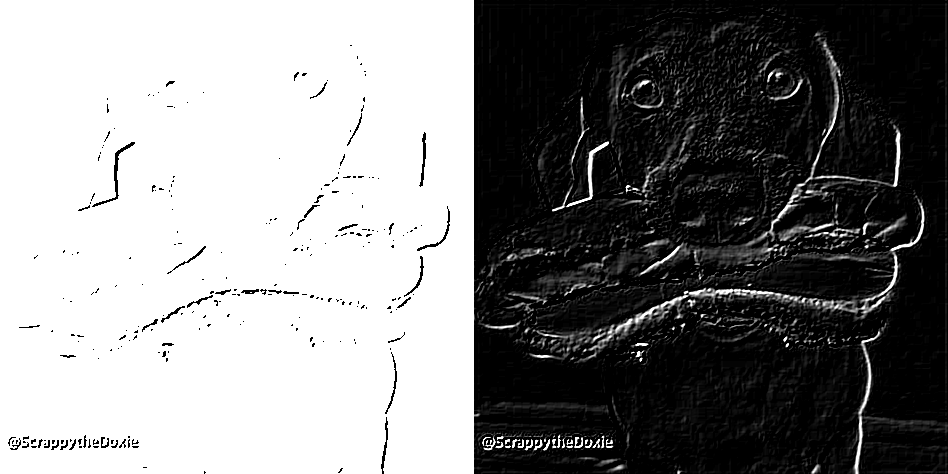

In [57]:
from numpy.lib.shape_base import get_array_prepare
from math import sqrt

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# step 1. Get x and y gradients . Use the correct kernels 

sobelX = cv2.Sobel(gray, cv2.CV_64F, 1,0)
sobelY = cv2.Sobel(gray, cv2.CV_64F, 0,1)
finalSobel = sobelX + sobelY

# step 2. Compute the magnitude of the gradient
mag = np.sqrt((sobelX**2) + (sobelY**2))
print("shape of sobel x and y added together")
print(mag.shape)
# print(mag)
real_final_image = cv2.filter2D(image, -1, mag)

# Step 3. Threshold. Choose 3 different threshold. visualize outputs 
_, th1 = cv2.threshold(finalSobel, 50, 255, cv2.THRESH_BINARY)
first_two = cv2.hconcat((finalSobel, th1))
print("Original Sobel Filter and Binary Threshold")
cv2_imshow(first_two)
_, th2 = cv2.threshold(finalSobel, 200, 255, cv2.THRESH_BINARY_INV)
_, th3 = cv2.threshold(finalSobel, 0, 255, cv2.THRESH_TOZERO)
print("Binary Threshold Inverse and To-Zero Threshold")
second_two = cv2.hconcat((th2, th3))
cv2_imshow(second_two)

It is very neat to see the sobel filtering take place and in particular, how taking the inverse of the binary threshold really inverts the image's colors completely. 


6. Use canny edge detector incorporated in opencv. Pick two diferent sets of hysteresys thresholds. What can you tell about the effect on the obtained edges.  


Thresholds of 1-150 for color and gray


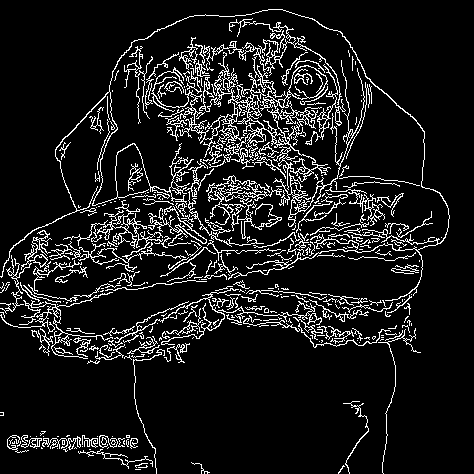

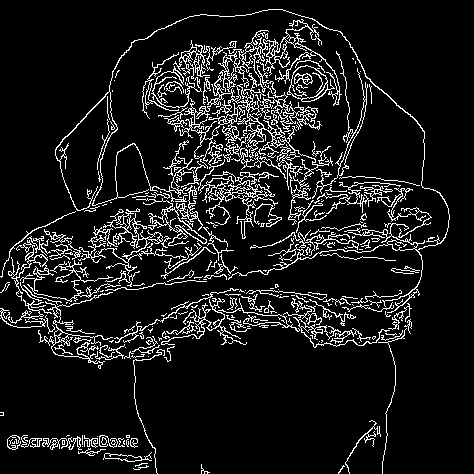

Thresholds of 0-255 for color and gray


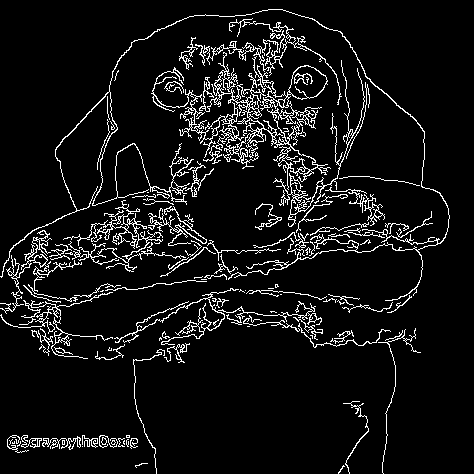

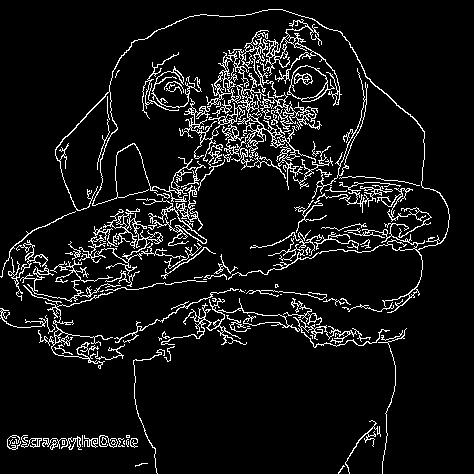

In [64]:
# use the canny from openCV
detect1 = cv2.Canny(image, 1, 150)
detect2 = cv2.Canny(image, 0, 255)
detect1_gray = cv2.Canny(gray, 1, 150)
detect2_gray = cv2.Canny(gray, 0, 255)
print("Thresholds of 1-150 for color and gray")
cv2_imshow(detect1)
cv2_imshow(detect1_gray)
print("Thresholds of 0-255 for color and gray")
cv2_imshow(detect2)
cv2_imshow(detect2_gray)


I think it is very interesting.  I believe setting a threshold between 1-150 provides results in more intricacies in the image being displayed, while 0-255 is better at displaying the general features that make up the image overall.

Using gray vs color images also results in differences, though the advantage that gray (seemingly) offers is minor.